In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from pyearth import Earth
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [10]:
link = 'https://github.com/FLS-6497/datasets/blob/main/projeto1/discursos_pres_internacionais.csv?raw=true'
discursos = pd.read_csv(link, sep=';')

link = 'https://github.com/FLS-6497/datasets/blob/main/projeto1/discursos_pres_internacionais_validacao.csv?raw=true'
validacao = pd.read_csv(link, sep=';')

# Modelo baseline 
- O mesmo rodado na aula 5

<AxesSubplot:ylabel='Count'>

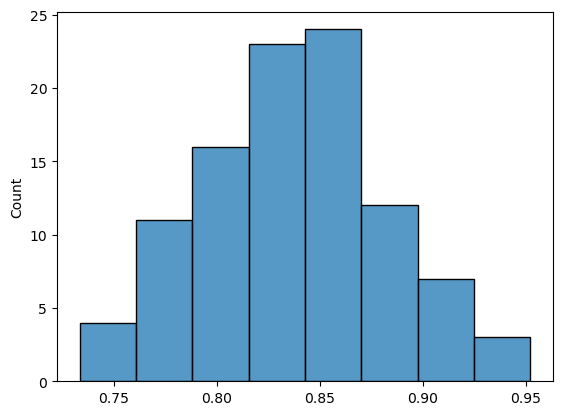

In [11]:
def get_nb_accuracy_2():
    X = discursos.discurso
    y = discursos.presidente

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    vectorizer = TfidfVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 2), 
        min_df=0.1
    )

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    X_train = X_train.toarray()
    X_test = X_test.toarray()

    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    accuracy_scr = accuracy_score(y_test, y_pred)
    return accuracy_scr

accuracy = [get_nb_accuracy_2() for i in range(100)]
sns.histplot(accuracy)

# Model tuning

In [12]:
def get_gnb_best_params():
    parameters = {'var_smoothing': [0.1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]}

    X   = discursos.discurso
    y = discursos.presidente

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    vectorizer = TfidfVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 2), 
        min_df=0.1
    )

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    X_train = X_train.toarray()
    X_test = X_test.toarray()

    gnb = GaussianNB()

    clf = GridSearchCV(gnb, parameters)
    clf.fit(X_train, y_train)

    return clf.best_params_

get_gnb_best_params()

{'var_smoothing': 0.01}

<AxesSubplot:ylabel='Count'>

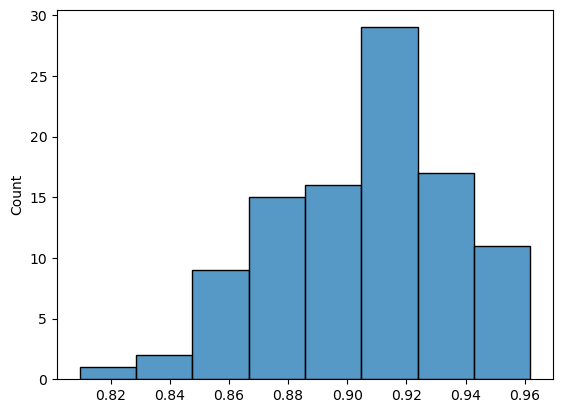

In [13]:
def get_nb_accuracy_best_params():
    X   = discursos.discurso
    y = discursos.presidente

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    vectorizer = TfidfVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 2), 
        min_df=0.1
    )

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    X_train = X_train.toarray()
    X_test = X_test.toarray()

    gnb = GaussianNB(var_smoothing=0.01)
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    accuracy_scr = accuracy_score(y_test, y_pred)
    return accuracy_scr

accuracy_nb_best_params = [get_nb_accuracy_best_params() for i in range(100)]
sns.histplot(accuracy_nb_best_params)

# Outros modelos
- Random Forest Classifier:

<AxesSubplot:ylabel='Count'>

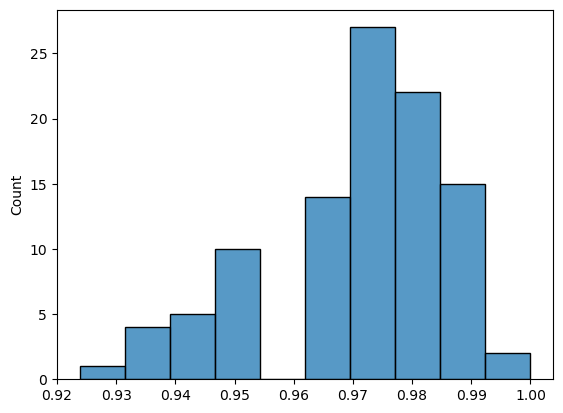

In [14]:
def get_rfc_accuracy():
    X = discursos.discurso
    y = discursos.presidente

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    vectorizer = TfidfVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 2), 
        min_df=0.1
    )

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    X_train = X_train.toarray()
    X_test = X_test.toarray()

    rfc = RandomForestClassifier()
    y_pred = rfc.fit(X_train, y_train).predict(X_test)
    accuracy_scr = accuracy_score(y_test, y_pred)
    return accuracy_scr

accuracy_rfc = [get_rfc_accuracy() for i in range(100)]
sns.histplot(accuracy_rfc)

In [15]:
def get_rfc_accuracy(best_params=False):
    parameters = {
        'n_estimators': [1, 10, 50, 100, 200, 300],
        'max_depth': [1, 2, 3, 5, 7, 10],
        'min_samples_split': [1, 2, 4, 8],
        'criterion': ['gini', 'entropy', 'log_loss']
        }
    
    X = discursos.discurso
    y = discursos.presidente
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    vectorizer = TfidfVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 2), 
        min_df=0.1
    )

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    
    rfc = RandomForestClassifier()

    y_pred = rfc.fit(X_train, y_train).predict(X_test)
    accuracy_scr = accuracy_score(y_test, y_pred)

    clf = GridSearchCV(rfc, parameters)
    clf.fit(X_train, y_train)

    rfc_best_params = RandomForestClassifier(
        n_estimators=clf.best_params_['n_estimators'],
        max_depth=clf.best_params_['max_depth'],
        min_samples_split=clf.best_params_['min_samples_split'],
        criterion=clf.best_params_['criterion']
    )

    y_pred_best_params = rfc_best_params.fit(X_train, y_train).predict(X_test)
    accuracy_scr_best_params = accuracy_score(y_test, y_pred)

    return accuracy_scr_best_params if best_params else accuracy_scr

In [16]:
accuracy_rfc = get_rfc_accuracy()
accuracy_rfc_best_params = get_rfc_accuracy(best_params=True)

# Comparação entre modelos

In [17]:
print(f"A precisão do modelo Gaussian Naive Bayes com conjunto padrão de parâmetros foi em média: {np.mean(accuracy)}")
print(f"A precisão do modelo Gaussian Naive Bayes com parâmetros validados em Grid Search foi em média: {np.mean(accuracy_nb_best_params)}")

print(f"A precisão do modelo Random Forest com conjunto padrão de parâmetros foi em média: {np.mean(accuracy_rfc)}")
print(f"A precisão do modelo Random Forest com parâmetros validados em Grid Search foi de: {np.mean(accuracy_rfc_best_params)}")

A precisão do modelo Gaussian Naive Bayes com conjunto padrão de parâmetros foi em média: 0.8361904761904762
A precisão do modelo Gaussian Naive Bayes com parâmetros validados em Grid Search foi em média: 0.9014285714285714
A precisão do modelo Random Forest com conjunto padrão de parâmetros foi em média: 0.9428571428571428
A precisão do modelo Random Forest com parâmetros validados em Grid Search foi de: 0.9428571428571428


# Cross Validation - Random Forest Classifier

In [18]:
# não consegui pensar em alguma forma melhor de usar o objeto com o modelo fora do escopo da função sem repetir praticamente todo o código

parameters = {
    'n_estimators': [1, 10, 50, 100, 200, 300],
    'max_depth': [1, 2, 3, 5, 7, 10],
    'min_samples_split': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy', 'log_loss']
    }

X = discursos.discurso
y = discursos.presidente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vectorizer = TfidfVectorizer(
    stop_words=stopwords.words('portuguese'),
    token_pattern=r"(?u)\b\w\w\w+\b",
    analyzer='word', 
    ngram_range=(1, 2), 
    min_df=0.1
)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

rfc = RandomForestClassifier()
y_pred = rfc.fit(X_train, y_train).predict(X_test)
accuracy_scr = accuracy_score(y_test, y_pred)

clf = GridSearchCV(rfc, parameters)
clf.fit(X_train, y_train)
rfc_best_params = RandomForestClassifier(
    n_estimators=clf.best_params_['n_estimators'],
    max_depth=clf.best_params_['max_depth'],
    min_samples_split=clf.best_params_['min_samples_split'],
    criterion=clf.best_params_['criterion']
)

cross_val_score(rfc_best_params, X_train, y_train, cv=10)

array([0.96      , 1.        , 1.        , 0.96      , 1.        ,
       0.95833333, 1.        , 1.        , 1.        , 1.        ])

# Aplicação na base de teste

In [19]:
def get_rfc_accuracy(best_params=False):
    parameters = {
        'n_estimators': [1, 10, 50, 100, 200, 300],
        'max_depth': [1, 2, 3, 5, 7, 10],
        'min_samples_split': [1, 2, 4, 8],
        'criterion': ['gini', 'entropy', 'log_loss']
        }
    
    X = discursos.discurso
    y = discursos.presidente
    X_test_final = validacao.discurso
    
    vectorizer = TfidfVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 2), 
        min_df=0.1
    )

    X = vectorizer.fit_transform(X)
    X_test_final = vectorizer.transform(X_test_final)

    X = X.toarray()
    X_test_final = X_test_final.toarray()
    
    rfc = RandomForestClassifier()

    clf = GridSearchCV(rfc, parameters)
    clf.fit(X, y)

    rfc_best_params = RandomForestClassifier(
        n_estimators=clf.best_params_['n_estimators'],
        max_depth=clf.best_params_['max_depth'],
        min_samples_split=clf.best_params_['min_samples_split'],
        criterion=clf.best_params_['criterion']
    )

    y_pred_best_params = rfc_best_params.fit(X, y).predict(X_test_final)

    return y_pred_best_params

In [20]:
get_rfc_accuracy(best_params=True)

array(['Dilma', 'Dilma', 'Lula', 'Temer', 'Dilma', 'Lula', 'Dilma',
       'Lula', 'Lula', 'Lula', 'Lula', 'Lula', 'Temer', 'Dilma', 'Dilma',
       'Lula', 'Lula', 'Dilma', 'Lula', 'Dilma', 'Temer', 'Dilma', 'Lula',
       'Temer', 'Lula'], dtype=object)

In [21]:
validacao['presidente_previsto'] = get_rfc_accuracy(best_params=True)
validacao

,discurso,id,presidente_previsto
0,"\nExcelentíssimo senhor Shinzo Abe, primeiro-m...",137,Dilma
1,\nFoto: Roberto Stuckert Filho/PR \n \nSenhor ...,90,Dilma
2,"\nExcelentíssimo senhor Paul Biya, presidente ...",229,Lula
3,"\nEu quero cumprimentar, em primeiro lugar, a ...",7,Temer
4,\nQuero dirigir um cumprimento especial à Zole...,91,Dilma
5,"\nExcelentíssimo Senhor Álvaro Uribe, Presiden...",364,Lula
6,\nSão passados mais de cinco anos do início da...,153,Dilma
7,\nÉ um grande prazer iniciar a primeira visita...,256,Lula
8,\n\n\nQuero agradecer ao presidente Ahmadineja...,254,Lula
9,"\nMeu caro amigo Raúl Castro, Presidente da Re...",374,Lula
